<a href="https://colab.research.google.com/github/mjschettini/PDI-Amanda-e-MariaJulia/blob/main/PDI_Trabalho1_Amanda_MariaJulia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


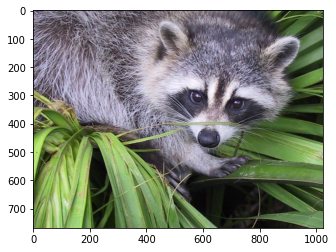

In [ ]:
# exemplo de código

import numpy as np
from matplotlib import pyplot as plt
from scipy import misc

image = misc.face()
plt.imshow(image)
plt.show()


dd# 1. Extração de Região de Interesse (ROI)

Crie uma função chamada crop(). Essa função receberá por parâmetro uma imagem, uma posição x, y e uma altura e largura. A função deverá retornar o pedaço recortado.

Suponha a imagem abaixo, que chamaremos de messiImg.

<img src="https://i.stack.imgur.com/6QscS.jpg"/>

Se sua função for chamada assim:

x_bola = 336
y_bola = 287
largura_bola = 163
altura_bola = 49
ballImg = crop(messiImg, x_bola, y_bola, largura_bola, altura_bola)

Ao final, ballImg deve conter apenas a imagem da bola.

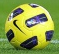


Agora você criará uma função que "cola" uma imagem menor em uma imagem maior.

Crie uma função chamada paste() que receberá, como parâmetro, uma imagem src (source), uma imagem dst (destiny) e uma posição x, y qualquer. Ela retornará a imagem modificada.

A imagem dst será "colada" na posição x, y da imagem src. Confira o exemplo abaixo.

newImg = paste(messiImg, ballImg, x, y)

É assim que ficará a imagem "newImg" (de acordo com a posição x e y)

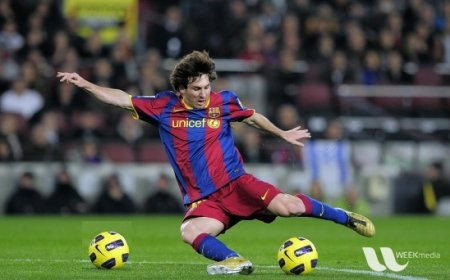

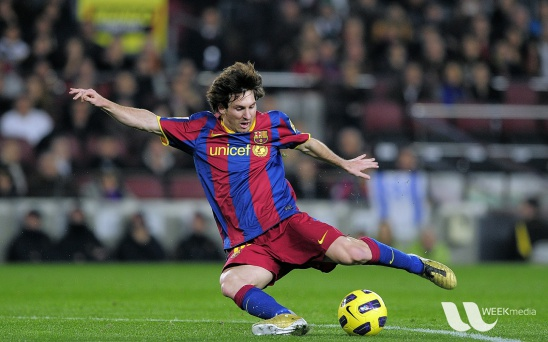

334 149


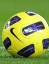

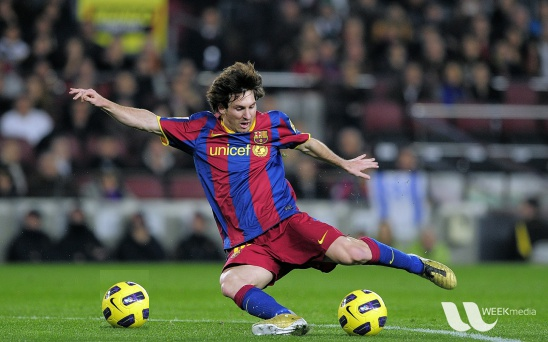

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#Função que corta uma imagem.
def crop (img, x, y, h, w):
    crop_img = img[y:y+h, x:x+w]
    return crop_img

#Função que "cola" uma imagem menor em uma imagem maior.
def paste(src, dst, x, y):
    (m, n, c) = dst.shape
    final1 = m+x
    final2 = n+y
    print (final1, final2)
    src[x:final1, y:final2] = dst
    return src;


img = cv2.imread("/content/drive/MyDrive/PDI/Numero1/messi.jpg")

cv2_imshow(img)
result_crop = crop (img, 336, 278, 163, 49)
result_paste = paste(img, result_crop, 270, 100)


cv2_imshow(result_crop)
cv2_imshow(result_paste)

#2. Trabalhando com Canais de Cores

Crie um algoritmo para saber qual imagem é mais "vermelha", "verde" ou "azul".

Para isso, você deverá pegar uma imagem qualquer e extrair cada um dos canais dela, em separado. Assim, você irá gerar 3 novas imagens, uma contendo apenas o canal vermelho, outra contendo somente o verde e a última, azul.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png"/>

A seguir, você tirará a média de cores da imagem (somar os tons de todos os pixels e dividir pelo total de pixels). Se a imagem do canal vermelho tiver a maior média, então a imagem é mais "vermelha" e assim por diante!

A imagem é mais azul
Imagem original


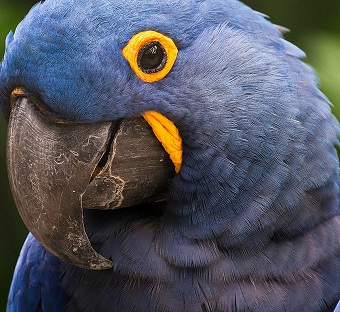

Canal vermelho


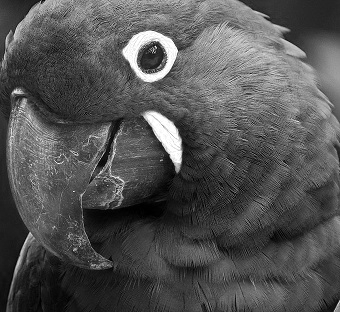

Canal verde


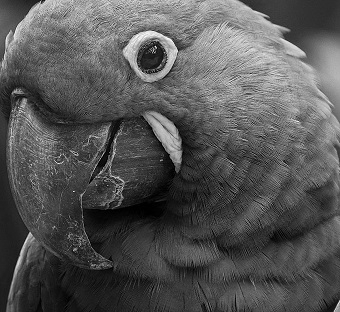

Canal azul


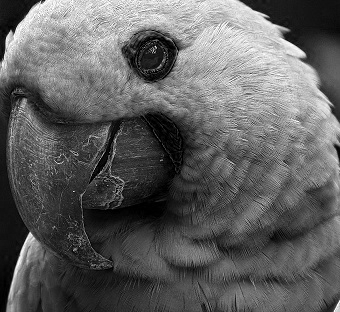

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#Le a imagem e armazena em img
img = cv2.imread("/content/drive/MyDrive/PDI/Numero2/arara.jpg")

#largura, altura da imagem
altura,largura,c = img.shape

#Cria uma matriz com mesmo tamanho da imagem 
b=np.zeros((altura,largura,c));
g=np.zeros((altura,largura,c));
r=np.zeros((altura,largura,c));

#Percorre toda a imagem.
for py in range(0,altura):
	for px in range(0,largura):
		#Separa o RGB de cada pixel da imagem
		b[py,px],g[py,px],r[py,px]=img[py,px]
sum_b=0.0
sum_g=0.0
sum_r=0.0

for y in range(0,altura):
	for x in range(0,largura):
		#Separa o RGB de cada pixel da imagem
		sum_b+=b[y,x]
		sum_g+=g[y,x]
		sum_r+=r[y,x]
media=np.zeros(3)	
media=[sum_b[0]/(altura*largura), sum_g[0]/(altura*largura),sum_r[0]/(altura*largura)]
cores=np.zeros(3)
cores=["azul", "verde", "vermelha"]

iMaior = 0
i = 0
while i < len(media):

    if media[i] >= media[iMaior]:
        iMaior = i
    i = i + 1

print("A imagem é mais",cores[iMaior])

#Converte para inteiro os valores da matriz imagem 

r=r.astype('uint8')
g=g.astype('uint8')
b=b.astype('uint8')

print("Imagem original")
cv2_imshow(img)
print("Canal vermelho")
cv2_imshow(r)
print("Canal verde")
cv2_imshow(g)
print("Canal azul")
cv2_imshow(b)

# 3. Junte pessoas usando Alpha Blending

No vídeo abaixo é feito uma "brincadeira" misturando o rosto de dois políticos brasileiros que antagonizam. A técnica utilizada é de transparência por alpha blending. 

<a href="https://www.youtube.com/watch?v=_NRIjiFnYlM"><img src="https://img.youtube.com/vi/_NRIjiFnYlM/mqdefault.jpg"/></a>

Agora é a sua vez! Pegue duas fotos (se você se sentir a vontade, pode ser uma sua e de um amigo que concorde) e crie uma versão híbrida de vocês.

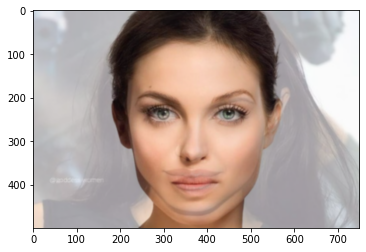

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#carregando as duas imagens
mulher1 = cv2.imread("/content/drive/MyDrive/PDI/Numero3/rosto1.jpg")
mulher2 = cv2.imread("/content/drive/MyDrive/PDI/Numero3/angelina.jpeg")
mulher1 = cv2.cvtColor(mulher1, cv2.COLOR_BGR2RGB)
mulher2 = cv2.cvtColor(mulher2, cv2.COLOR_BGR2RGB)
#garantir que as duas imagens tenham as mesmas dimensões
h, w, _ = mulher1.shape
mulher2 = cv2.resize(mulher2, (w, h))

result = cv2.addWeighted(mulher1, 0.6, mulher2, 0.4, 0)
result = cv2.GaussianBlur(result,(5,5),0)

plt.imshow(result)


#4. Histograma de Cores

Nos vídeos abaixo, é discutido o tema de histograma de cores em imagens digitais.

<a href="https://www.youtube.com/watch?v=ioa_mFB_nFg"><img src="https://img.youtube.com/vi/ioa_mFB_nFg/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=83RZSK1j8Ak"><img src="https://img.youtube.com/vi/83RZSK1j8Ak/mqdefault.jpg"/></a>

Nesse exercício, quero que você selecione 2 imagens distintas entre si. Uma deve ser preto e branco e a outra colorida.

Plote (desenhe o gráfico) dos seus histogramas na tela via Python e OpenCV.

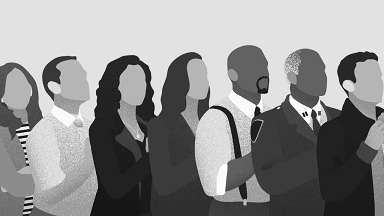

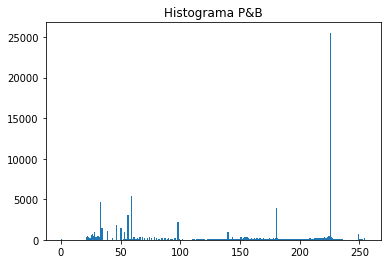

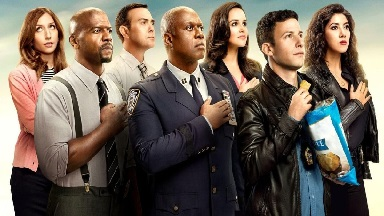

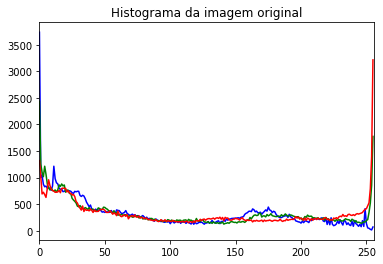

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#Carregando imagem P&B
imgpb = cv2.imread("/content/drive/MyDrive/PDI/Numero4/b991.jpg", 0)
#Mostrando a imagemP&B
#plt.imshow(imgpb)
cv2_imshow(imgpb)

#Construindo o histograma da imagem P&B
plt.hist(imgpb.ravel(), 256, [0, 255])
#Histograma da imagem P&B
plt.title('Histograma P&B')
plt.show()

#Carregando imagem original
img = cv2.imread ("/content/drive/MyDrive/PDI/Numero4/b99.png")

#Exibindo a imagem original
#plt.imshow(img)
cv2_imshow(img)

#Lista para os canais
color = ('b', 'g', 'r')
#For de iterações para cada canal
for i, col in enumerate (color):
  #calculando o histograma 
  histo = cv2.calcHist([img], [i], None, [256], [0, 256]) 
  plt.plot(histo, color = col)
  plt.xlim([0, 256])

#Plotando o histograma da imagem colorida
plt.title('Histograma da imagem original')
plt.show()

#Fixando a imagem na tela
cv2.waitKey(0)
cv2.destroyAllWindows()


#5. Adição de Imagens

No vídeo abaixo, é apresentada uma maneira de se fazer adição de imagens (inserir uma imagem menor dentro de uma imagem maior), podendo inclusive combinar esse efeito com a transparência.

<a href="https://www.youtube.com/watch?v=60k962jJAmE"><img src="https://img.youtube.com/vi/60k962jJAmE/mqdefault.jpg"/></a>

Dito isso, faça um algoritmo que receba uma imagem e insira uma marca d'água sobre essa figura. Considere a imagem abaixo como referência.

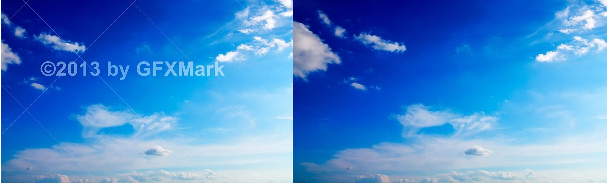

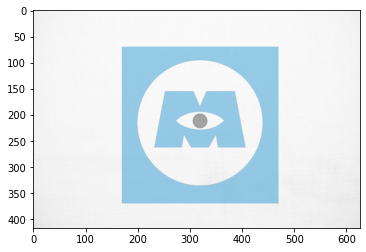

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Redimensionando a imagem.
def resizeImage(image, scalePercent):
    width = int(image.shape[1] * scalePercent / 100)
    height = int(image.shape[0] * scalePercent / 100)
    image = cv2.resize(image, (width, height))

    return image

def addImageOverlay(background, foreground, translationForegroundW, translationForegroundH):
    backH, backW, _ = background.shape
    foreH, foreW, _ = foreground.shape
    remainingH, remainingW = backH - foreH, backW - foreW

    if translationForegroundH + foreH > backH:
        print("Erro: sobreposição com altura maior do que a permitida.")
        print("Posição final que altura do objeto da frente termina:", translationForegroundH + foreH)
        print("Altura do fundo:", backH)
        return

    if translationForegroundW + foreW > backW:
        print("Erro: sobreposição com largura maior do que a permitida.")
        print("Posição final que largura do objeto da frente termina:", translationForegroundW + foreW)
        print("Largura do fundo:", backW)
        return

    #parte do cenário do fundo em que a imagem será adicionada
    crop = background[translationForegroundH : foreH + translationForegroundH, translationForegroundW : foreW + translationForegroundW]

    #Transformamos o foreground em imagem com tons de cinza e criamos uma máscara binária da mesma com a binarização (cv2.threshold)
    foregroundGray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
    #plt.imshow(foregroundGray)
    ret, maskFore = cv2.threshold(foregroundGray, 240, 255, cv2.THRESH_BINARY)
    #plt.imshow(maskFore)
    #Agora aplicamos uma operação de AND binário na imagem recortada 'crop'. No caso, realizar a operação binária entre a mesma imagem não terá efeito. Só que, com a inclusão da máscara no terceiro parâmetro, os pixels pretos de maskFore serão ignorados e, portanto, ficarão escuros. Com isso temos a marcação em que vamos incluir o foreground posteriormente.
    backWithMask = cv2.bitwise_and(crop, crop, mask = maskFore)
    foreWithMask = cv2.bitwise_not(maskFore)
    foreWithMask = cv2.bitwise_and(foreground, foreground, mask = foreWithMask)

    #Faremos a composição entre 'frente' e 'fundo', compondo o foreground na imagem extraída do background.
    combinedImage = cv2.add(foreWithMask, backWithMask)

    #Adicionamos a imagem gerada no background final.
    copyImage = background.copy()
    copyImage[translationForegroundH:foreH + translationForegroundH, translationForegroundW:foreW + translationForegroundW] = combinedImage

    return copyImage

def addBlendingEffect(firstImage, secondImage, weight):
    firstImageGray = cv2.cvtColor(firstImage, cv2.COLOR_BGR2GRAY)
    secondImageGray = cv2.cvtColor(secondImage, cv2.COLOR_BGR2GRAY)

    mask = firstImageGray - secondImageGray
    ret, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)

    copyImg = firstImage.copy()
    altura, largura, = mask.shape
    for y in range(0, altura):
        for x in range(0, largura):
            if mask.item(y, x) == 255:
                blendingPixelBlue = firstImage.item(y, x, 0) * (1.0 - weight) + secondImage.item(y, x, 0) * weight
                blendingPixelGreen = firstImage.item(y, x, 1) * (1.0 - weight) + secondImage.item(y, x, 1) * weight
                blendingPixelRed = firstImage.item(y, x, 2) * (1.0 - weight) + secondImage.item(y, x, 2) * weight

                copyImg.itemset((y, x, 0), blendingPixelBlue)
                copyImg.itemset((y, x, 1), blendingPixelGreen)
                copyImg.itemset((y, x, 2), blendingPixelRed)

    return copyImg

def memeGeneratorWithBlending(background, foreground):
    #Adicionando uma imagem a outra.
    finalImage = addImageOverlay(background, foreground,170, 70)
    #Alterando a transparencia da imagem, para isso, utilizei o finalImage como a segunda imagem,
    #porque, além de eu precisar que as imagens tenham o mesmo tamanho, o fundo precisa ser o mesmo.
    finalImage = addBlendingEffect(background, finalImage, 0.4)
    
    plt.imshow(finalImage)

image1 = cv2.imread("/content/drive/MyDrive/PDI/Numero5/fundoImg.jpg")
image2 = cv2.imread("/content/drive/MyDrive/PDI/Numero5/monstrosSA.png")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
memeGeneratorWithBlending(image1, image2)


#6. Equalização de histograma

Utilizando a ideia dessa página, crie um algoritmo que faça a equalização de histograma da imagem abaixo, a fim de melhorar seu contraste. 

Sugestão: <a href="https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html">siga este tutorial</a>.

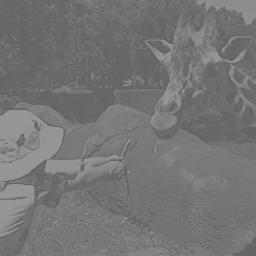

Imagem original


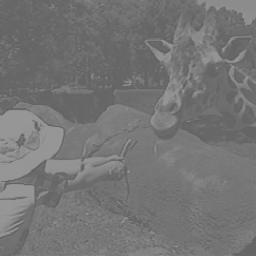

Imagem equalizada


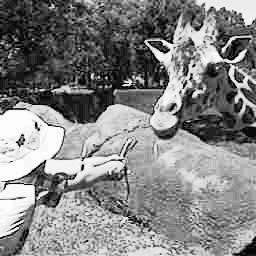

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#Carregando a imagem
img = cv2.imread('/content/drive/MyDrive/PDI/Numero6/img6.png')
#Convertendo a imagem para escala de cinza
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Carregando e plotando a imagem original em escala de cinza
print("Imagem original")
cv2_imshow(img)

#Função para equalizar a imagem através do histograma 
equalizada = cv2.equalizeHist(img)
#Carregando e plotando a imagem equalizada
print("Imagem equalizada")
cv2_imshow(equalizada)


cv2.waitKey(0)
cv2.destroyAllWindows()


#7. Meu primeiro buscador de imagens!

[Um jeito muito simples de verificar se uma imagem é igual a outra  é por meio de comparação entre histogramas](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html). 

Dito isso, você deverá fazer o seguinte:

* Crie uma pasta contendo ao menos 5 imagens, das quais duas precisam ser muito similares em seu conteúdo visual (mas não idênticas). Para facilitar, vamos chamar as imagens muito parecidas de S1 e S2. As imagens restantes que são diferentes, serão D1, D2 e D3.
* Faça uma função que receba as imagens S1 e compare ela com S2, D1, D2 e D3 pelo histograma. 
* Compare a distância de S1 para cada imagem considerando as métricas da Correlação, Chi-Square e Bhattacharrya. 
* Para cada imagem, some as três distâncias ao quadrado e aplique a raiz quadrada: sqrt(Corr^2 + Chi-Sq^2 + Bhatta^2)
* Retorne a imagem mais parecida com S1 (o par que tiver a menor distância)

COMPARAÇÃO S1 E S1 - VALORES PARA IMAGENS 100% IGUAIS.
MÉTODO CORRELAÇÃO: 1.0
MÉTODO CHI-SQUARE:  0.0
MÉTODO BHATTACHARRYA:  0.0

COMPARAÇÃO S1 E S2
MÉTODO CORRELAÇÃO:  0.7908821617163991
MÉTODO CHI-SQUARE:  74.67404158780134
MÉTODO BHATTACHARRYA:  0.2848308884843546
RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO: 74.67877282257281

COMPARAÇÃO S1 E D1
MÉTODO CORRELAÇÃO:  0.37950978785826567
MÉTODO CHI-SQUARE:  14427.756840310098
MÉTODO BHATTACHARRYA:  0.5748828111525085
RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO: 14427.756856754717

COMPARAÇÃO S1 E D2
MÉTODO CORRELAÇÃO:  0.381628328022903
MÉTODO CHI-SQUARE:  149.529614756498
MÉTODO BHATTACHARRYA:  0.5225260314175156
RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO: 149.53101471889022

COMPARAÇÃO S1 E D3
MÉTODO CORRELAÇÃO:  0.3194689551333532
MÉTODO CHI-SQUARE:  236.29747793677723
MÉTODO BHATTACHARRYA:  0.5872668798534841
RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO: 236.2984236555191

A IMAGEM MAIS PARECIDA COM S1 É:


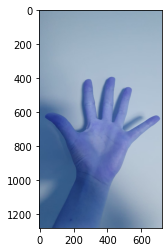

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import *
def compare_histograma (hsv_S1, hsv_img):
  #ARGUMENTOS PARA CALCULAR O HISTOGRAMA.
  h_bins = 50
  s_bins = 60
  histSize = [h_bins, s_bins]
  h_ranges = [0, 180]
  s_ranges = [0, 256]
  ranges = h_ranges + s_ranges 
  channels = [0, 1]
  #CALCULANDO HISTOGRAMAS E SUA NORMALIZAÇÃO.
  hist_S1 = cv2.calcHist([hsv_S1], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_S1, hist_S1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
  hist_img = cv2.calcHist([hsv_img], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_img, hist_img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
  # APLICANDO OS 4 METODOS DE COMPARAÇÃO ENTRE S1 E A OUTRA IMAGEM
  s1_img = np.zeros(4)
  for compare_method in range(4):
    s1_img[compare_method] = cv2.compareHist(hist_S1, hist_img, compare_method)
  
  return s1_img;


#CALCULA A RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO.
def Operation(compareHist):
  return sqrt((compareHist[0]*compareHist[0])+(compareHist[1]*compareHist[1])+(compareHist[3]*compareHist[3]))

#VERIFICA QUAL A MENOR DISTANCIA.
def compareDistancias(menor_Distancia):
  return menor_Distancia.min()

#OBTENDO AS IMAGENS E AS TRANSFORMANDO DE BGR PARA HSV.
s1 = cv2.imread("/content/drive/MyDrive/PDI/Numero7/s1.jpeg")
s2 = cv2.imread("/content/drive/MyDrive/PDI/Numero7/s2.jpeg")
d1 = cv2.imread("/content/drive/MyDrive/PDI/Numero7/d1.jpeg")
d2 = cv2.imread("/content/drive/MyDrive/PDI/Numero7/d2.jpeg")
d3 = cv2.imread("/content/drive/MyDrive/PDI/Numero7/d3.jpeg")
hsvS1 = cv2.cvtColor(s1, cv2.COLOR_BGR2HSV)
hsvS2 = cv2.cvtColor(s2, cv2.COLOR_BGR2HSV)
hsvD1 = cv2.cvtColor(d1, cv2.COLOR_BGR2HSV)
hsvD2 = cv2.cvtColor(d2, cv2.COLOR_BGR2HSV)
hsvD3 = cv2.cvtColor(d3, cv2.COLOR_BGR2HSV)

#CHAMANDO A FUNÇÃO compare_histograma
compare_s1_s1 = compare_histograma(s1, s1)
print("COMPARAÇÃO S1 E S1 - VALORES PARA IMAGENS 100% IGUAIS.")
print("MÉTODO CORRELAÇÃO:", compare_s1_s1[0])
print("MÉTODO CHI-SQUARE: ", compare_s1_s1[1])
print("MÉTODO BHATTACHARRYA: ", compare_s1_s1[3])
print("")
compare_s1_s2 = compare_histograma(s1, s2)
print("COMPARAÇÃO S1 E S2")
print("MÉTODO CORRELAÇÃO: ", compare_s1_s2[0])
print("MÉTODO CHI-SQUARE: ", compare_s1_s2[1])
print("MÉTODO BHATTACHARRYA: ", compare_s1_s2[3])
print("RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO:", Operation(compare_s1_s2))
print("")
compare_s1_d1 = compare_histograma(s1, d1)
print("COMPARAÇÃO S1 E D1")
print("MÉTODO CORRELAÇÃO: ", compare_s1_d1[0])
print("MÉTODO CHI-SQUARE: ", compare_s1_d1[1])
print("MÉTODO BHATTACHARRYA: ", compare_s1_d1[3])
print("RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO:", Operation(compare_s1_d1))
print("")
compare_s1_d2 = compare_histograma(s1, d2)
print("COMPARAÇÃO S1 E D2")
print("MÉTODO CORRELAÇÃO: ", compare_s1_d2[0])
print("MÉTODO CHI-SQUARE: ", compare_s1_d2[1])
print("MÉTODO BHATTACHARRYA: ", compare_s1_d2[3])
print("RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO:", Operation(compare_s1_d2))
print("")
compare_s1_d3 = compare_histograma(s1, d3)
print("COMPARAÇÃO S1 E D3")
print("MÉTODO CORRELAÇÃO: ", compare_s1_d3[0])
print("MÉTODO CHI-SQUARE: ", compare_s1_d3[1])
print("MÉTODO BHATTACHARRYA: ", compare_s1_d3[3])
print("RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO:", Operation(compare_s1_d3))
print("")
menor_Distancia = np.zeros(4)
menor_Distancia[0] = Operation(compare_s1_s2)
menor_Distancia[1] = Operation(compare_s1_d1)
menor_Distancia[2] = Operation(compare_s1_d2)
menor_Distancia[3] = Operation(compare_s1_d3)
print("A IMAGEM MAIS PARECIDA COM S1 É:")
imgsParecidas = compareDistancias(menor_Distancia)
if(imgsParecidas == menor_Distancia[0]):
  plt.imshow(s2)
elif (imgsParecidas == menor_Distancia[1]):
  plt.imshow(d1)
elif (imgsParecidas == menor_Distancia[2]):
  plt.imshow(d2)
else:
  plt.imshow(d3)


#8. Rastreamento (Tracking)

Quando falamos do rastreamento de um objeto, estamos nos referindo a uma aplicação que "acompanha" o movimento de um objeto em um vídeo, marcando a posição dele tipicamente em caixas envolventes. Abaixo tem-se um exemplo:

<img src="https://i.pinimg.com/originals/41/36/f9/4136f909c378936cdf33f2cd975d081c.gif"/>

Nesse exercício, implemente o rastreio de um objeto com uma cor definida, nos moldes do exemplo do vídeo abaixo.

<a href="https://www.youtube.com/watch?v=M2wcIsMXPEA"><img src="https://img.youtube.com/vi/M2wcIsMXPEA/mqdefault.jpg"/></a>

In [38]:
#Exercício feito no terminal, pois o colab não permitiu a plotagem de vídeo.
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#Importa o vídeo
captura = cv2.VideoCapture("/content/drive/MyDrive/PDI/Numero8/video.mp4")
points = []
#Enquanto o não fecha 
while (True):
	#Le o cada frame do video
	_,fVideo = captura.read()

	#Converte de RGB para HSV
	#fVideoHSV = cv2.cvtColor(fVideo, cv2.COLOR_BGR2HSV)
	
	#Define o intervalo de cor a ser reconhecido
	minimo = np.array([111, 50, 50]) #valores mínimos
	maximo = np.array([127, 255, 255]) #valores máximos

	#Delimita a área 
	mask = cv2.inRange(fVideoHSV, minimo, maximo)
	#cv2.imshow('mask',mask)
	


	#Obtem o contorno da forma 
	contorno,hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

	if(contorno):
		#obtem o primeiro contorno
		maxArea = cv2.contourArea(contorno[0])
		contornoMaior = 0
		j=0
		for cont in contorno:
			#Obtem o maior contorno
			if maxArea < cv2.contourArea(cont):
				maxArea = cv2.contourArea(cont)
				contornoMaior = j
			j +=1

		#Cálculo do retângulo que contorna a area capturada
		x, y, w, h = cv2.boundingRect(contorno[contornoMaior])
		#points = []
		points.append((int(w/2+x), int(h/2+y)))
		
		if len(points)>1:
			for j in range(1,len(points)):
				cv2.line(fVideo, points[j],points[j-1],(255,255,0),2*j)
		if len(points)>10:
			points.pop(0)
		#Montagem do retângulo
		#cv2.rectangle(fVideo,(x,y),(x+w,y+w), (0,0,255),3)
		cv2.drawContours(fVideo,[contorno[contornoMaior]],0,(0,255,0),3)
    
		#cv2_imshow(fVideo)
		cv2.imshow("Rastreamento", fVideo)
    #cv2.imshow('mask',mask)
		 
  
		if cv2.waitKey(25) & 0xFF == ord('q'):
		  break

cv2.destroyAllWindows()



DisabledFunctionError: ignored

#9. Limiarização de Imagens

Nos vídeos abaixo, é discutido o tema de limiarização de imagens.

<a href="https://www.youtube.com/watch?v=P2R7Nn1_VwQ"><img src="https://img.youtube.com/vi/P2R7Nn1_VwQ/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=onI2lQ0V0pc"><img src="https://img.youtube.com/vi/onI2lQ0V0pc/mqdefault.jpg"/></a>

Nesse exercício, quero que você construa um limiarizador com um trackbar (barra) que permite ajuste dinâmico do limiar. Considere o vídeo abaixo para saber como construir.

<a href="https://www.youtube.com/watch?v=OTiy8knQjJs"><img src="https://img.youtube.com/vi/OTiy8knQjJs/mqdefault.jpg"/></a>

In [ ]:
#Exercício feito no jupyter notebook, pois o colab não permitiu a abertura de uma janela com a imagem.
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

ESCAPE_KEY_ASCII = 27

def onChange(value):
    #print("valor alterado", value)
    pass

image1 = cv2.imread("/content/drive/MyDrive/PDI/Numero9/moedas.jpeg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
copyimg = image1.copy()

#Cria janela gráfica para inserir a imagem
windowTitle = "limiarizador com um trackbar"
cv2.namedWindow(windowTitle)

#cria trackbar
cv2.createTrackbar("limiar", windowTitle, 0, 255, onChange)


before_limiar = 0
update_limiar = False

counter_time = 0

while True:
    current_limiar = cv2.getTrackbarPos("limiar", windowTitle)
    if before_limiar != current_limiar:
        update_limiar = True
        counter_time = time.time()
        before_limiar = current_limiar
        
    #se tiver passado 1 segundo desde que o usuário mexeu no trackbar, atualizamos o limiar da imagem.
    if time.time() - counter_time > 1:
        #se tiver sido marcado que é pra atualizar o limiar
        if update_limiar == True:
            copyimg = cv2.adaptiveThreshold(image1, current_limiar, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2)
            update_limiar = False
    cv2.imshow(windowTitle, copyimg)
    
    keyPressed = cv2.waitKey(1) & 0xFF #cv2.waitKey(1) & 111111
    if keyPressed == ESCAPE_KEY_ASCII:
        break
    
cv2.destroyAllWindows()


#10. Filtragem

Considere os seguintes filtros:

*   Filtro da Média
*   Filtro Gaussiano
*   Filtro da Mediana
*   Filtro Sobel
*   Filtro Laplaciano

Crie uma função que receba uma imagem e o nome do filtro. Essa função deve retornar a imagem com o filtro aplicado. 

A seguir, apresente todas as imagens com os filtros aplicados em um grid. Use os subplots conforme apresentados no vídeo abaixo:
<a href="https://www.youtube.com/watch?v=U35qns3LvvI"><img src="https://img.youtube.com/vi/U35qns3LvvI/mqdefault.jpg"/></a>


Referências:
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html">Link 1</a> e <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html">Link 2</a>.

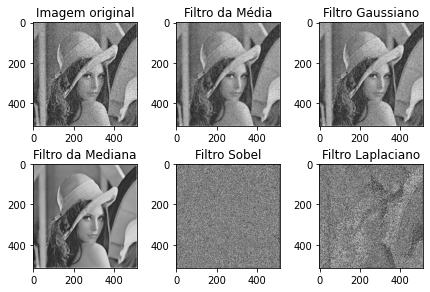

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def filtragem (img,filtro):
	if (filtro == "Filtro da Média"):
		imgFiltrada = cv2.blur(img,(5,5))
	elif (filtro == "Filtro Gaussiano"):
		imgFiltrada = cv2.GaussianBlur(img,(5,5),0)
	elif (filtro == "Filtro da Mediana"):
		imgFiltrada = cv2.medianBlur(img,5)
	elif (filtro == "Filtro Sobel"):
		imgFiltrada = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
	elif (filtro == "Filtro Laplaciano"):
		img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
		imgFiltrada = cv2.Laplacian(img,cv2.CV_64F)
	return imgFiltrada

def showImage(img):
    imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(imgMPLIB)
    plt.show()

def showImageGrid(img, title):
    fig, axis = plt.subplots()
    imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axis.imshow(imgMPLIB)
    axis.set_title(title)
    plt.show()

def showMultipleImageGrid(imgsArray, titlesArray, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showImageGrid(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y)
        fig.suptitle(titlesArray)
        yId = 0
        for img in imgsArray:
            imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axis[yId].imshow(imgMPLIB)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axis[xId].imshow(imgMPLIB)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axis[yId, xId].set_title(titlesArray[titleId])
            axis[yId, xId].imshow(imgMPLIB)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1

        fig.tight_layout(pad=0.5)
    plt.show()

img = cv2.imread('/content/drive/MyDrive/PDI/Numero10/lana.png')


title=["Imagem original","Filtro da Média","Filtro Gaussiano","Filtro da Mediana","Filtro Sobel","Filtro Laplaciano"]

img1=filtragem(img,title[1])
img2=filtragem(img,title[2])
img3=filtragem(img,title[3])
img4=filtragem(img,title[4])
img5=filtragem(img,title[5])

img1= img1.astype('uint8')
img2= img2.astype('uint8')
img3= img3.astype('uint8')
img4= img4.astype('uint8')
img5= img5.astype('uint8')

vetImg=[img,img1, img2, img3, img4,img5]
showMultipleImageGrid(vetImg,title,int(3),int(2))
